In [34]:
from numpy import *
import matplotlib.pyplot as plt

In [35]:
def loadDataSet(fileName, delim='\t'):
    fr = open(fileName)
    stringArr = [line.strip().split(delim) for line in fr.readlines()]
    datArr = [list(map(float, line)) for line in stringArr]
    return mat(datArr)

In [36]:
def pca(dataMat, topNfeat=9999999):
    """pca

    Args:
        dataMat   原数据集矩阵
        topNfeat  应用的N个特征
    Returns:
        lowDDataMat  降维后数据集
        reconMat     新的数据集空间
    """

    # 计算每一列的均值
    meanVals = mean(dataMat, axis=0)
    # print 'meanVals', meanVals

    # 每个向量同时都减去 均值
    meanRemoved = dataMat - meanVals
    # print 'meanRemoved=', meanRemoved

    # cov协方差=[(x1-x均值)*(y1-y均值)+(x2-x均值)*(y2-y均值)+...+(xn-x均值)*(yn-y均值)+]/(n-1)
    '''
    方差：（一维）度量两个随机变量关系的统计量
    协方差： （二维）度量各个维度偏离其均值的程度
    协方差矩阵：（多维）度量各个维度偏离其均值的程度

    当 cov(X, Y)>0时，表明X与Y正相关；(X越大，Y也越大；X越小Y，也越小。这种情况，我们称为“正相关”。)
    当 cov(X, Y)<0时，表明X与Y负相关；
    当 cov(X, Y)=0时，表明X与Y不相关。
    '''
    covMat = cov(meanRemoved, rowvar=0)

    # eigVals为特征值， eigVects为特征向量
    eigVals, eigVects = linalg.eig(mat(covMat))
    # print 'eigVals=', eigVals
    # print 'eigVects=', eigVects
    # 对特征值，进行从小到大的排序，返回从小到大的index序号
    # 特征值的逆序就可以得到topNfeat个最大的特征向量
    '''
    >>> x = np.array([3, 1, 2])
    >>> np.argsort(x)
    array([1, 2, 0])  # index,1 = 1; index,2 = 2; index,0 = 3
    >>> y = np.argsort(x)
    >>> y[::-1]
    array([0, 2, 1])
    >>> y[:-3:-1]
    array([0, 2])  # 取出 -1, -2
    >>> y[:-6:-1]
    array([0, 2, 1])
    '''
    eigValInd = argsort(eigVals)
    # print 'eigValInd1=', eigValInd

    # -1表示倒序，返回topN的特征值[-1 到 -(topNfeat+1) 但是不包括-(topNfeat+1)本身的倒叙]
    eigValInd = eigValInd[:-(topNfeat+1):-1]
    # print 'eigValInd2=', eigValInd
    # 重组 eigVects 最大到最小
    redEigVects = eigVects[:, eigValInd]
    # print 'redEigVects=', redEigVects.T
    # 将数据转换到新空间
    # print "---", shape(meanRemoved), shape(redEigVects)
    lowDDataMat = meanRemoved * redEigVects
    reconMat = (lowDDataMat * redEigVects.T) + meanVals
    # print 'lowDDataMat=', lowDDataMat
    # print 'reconMat=', reconMat
    return lowDDataMat, reconMat

In [37]:
dataMat = loadDataSet('testSet.txt')
lowDMat, reconMat = pca(dataMat, 1)

In [38]:
shape(lowDMat)

(1000, 1)

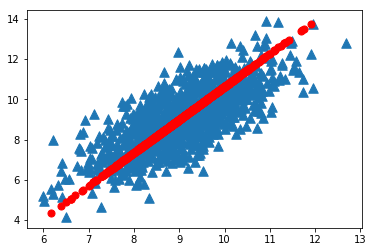

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(dataMat[:, 0].flatten().A[0], dataMat[:, 1].flatten().A[0], marker='^', s=90)
ax.scatter(reconMat[:, 0].flatten().A[0], reconMat[:, 1].flatten().A[0], marker='o', s=50, c='red')
plt.show()

# 利用PCA对半导体制造数据降维

In [40]:
def replaceNanWithMean():
    datMat = loadDataSet('secom.data', ' ')
    numFeat = shape(datMat)[1]
    for i in range(numFeat):
        # 对value不为NaN的求均值
        # .A 返回矩阵基于的数组
        meanVal = mean(datMat[nonzero(~isnan(datMat[:, i].A))[0], i])
        # 将value为NaN的值赋值为均值
        datMat[nonzero(isnan(datMat[:, i].A))[0],i] = meanVal
    return datMat

In [41]:
dataMat = replaceNanWithMean()
meanVals = mean(dataMat, axis=0)
meanRemoved = dataMat - meanVals

In [42]:
covMat = cov(meanVals)

In [43]:
eigVals, eigVexts = linalg.eig(mat(covMat))
eigVals

array([ 371882.9409065])